In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import heapq

# Load Data

### Read CSV

In [398]:
df = pd.read_csv("data/rotten_tomatoes_movies.csv")

df['original_release_date'] = pd.to_datetime(df['original_release_date'])


print(f"There are {len(df)} rows")

df.head(3)

There are 17712 rows


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


### Drop Rows

In [399]:
print(f"The most common number of audience reviews for a movie is {int(df['audience_count'].mode().iloc[0])}")

print()

vals = df.nsmallest(5145, 'audience_count')['audience_count'].value_counts()
print(vals)
print("About 5000 movies have less than 1000 audience reviews")

print()

print('Drop all movies with less than 1000 audience reviews')
df = df[df["audience_count"] > 1000]

print(f"Now the most common number of audience reviews for a movie is {int(df['audience_count'].mode().iloc[0])}")

print()

print(f"There are now {len(df)} rows")

The most common number of audience reviews for a movie is 5

audience_count
5.0      24
11.0     22
6.0      20
71.0     19
7.0      18
         ..
954.0     1
992.0     1
988.0     1
987.0     1
986.0     1
Name: count, Length: 962, dtype: int64
About 5000 movies have less than 1000 audience reviews

Drop all movies with less than 1000 audience reviews
Now the most common number of audience reviews for a movie is 1126

There are now 12272 rows


In [400]:
# cutoff_date = pd.Timestamp('1990-01-01')
cutoff_date = pd.Timestamp('2000-01-01')
# cutoff_date = pd.Timestamp('2010-01-01')
df = df[df['original_release_date'] >= cutoff_date]

print(f"There are now {len(df)} rows")
df.head(3)


There are now 7137 rows


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137


In [401]:
df = df[df['runtime'].notnull()]

### Drop Features

In [402]:
df = df.drop(["rotten_tomatoes_link", "movie_info", "critics_consensus", "authors",
              "tomatometer_status", "tomatometer_count", "audience_count",
              "audience_status", "tomatometer_top_critics_count", "tomatometer_fresh_critics_count",
              "tomatometer_rotten_critics_count"], axis=1)
df.head(3)

,movie_title,content_rating,genres,directors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_rating,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,49.0,53.0
1,Please Give,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,87.0,64.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2013-06-22,109.0,Warner Bros. Pictures,8.0,37.0


# Evaluate Features

### Distribution of Ratings

### Understanding How Rotten Tomatoes Ratings Work

Tomatometer: This score is based on the percentage of professional critics who give a movie a positive review.

Audience Score: This represents the percentage of users who rated the movie  positively.

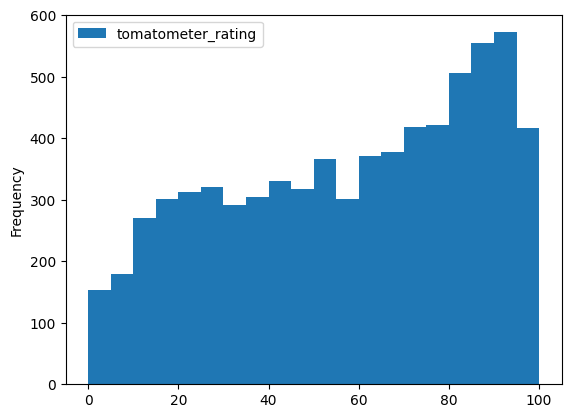

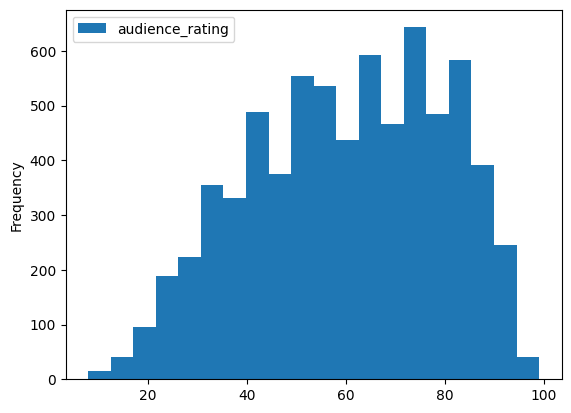

In [403]:
df.plot(y='tomatometer_rating', kind='hist', bins=20)
df.plot(y='audience_rating', kind='hist', bins=20)
plt.show()

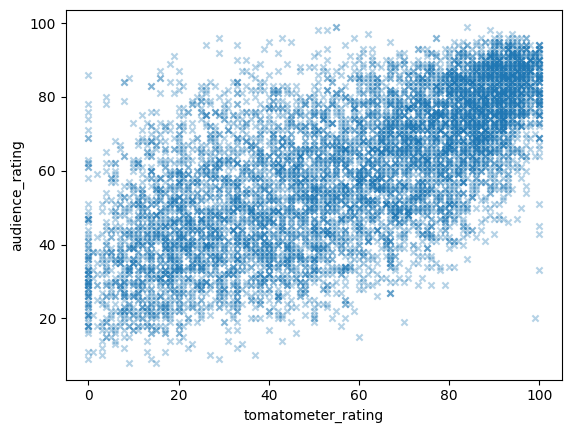

In [404]:
df.plot(x='tomatometer_rating', y='audience_rating', kind='scatter', marker='x', alpha=0.33)
plt.show()

Generally, it seems that audience rating and critic rating increase together.

### Release Date

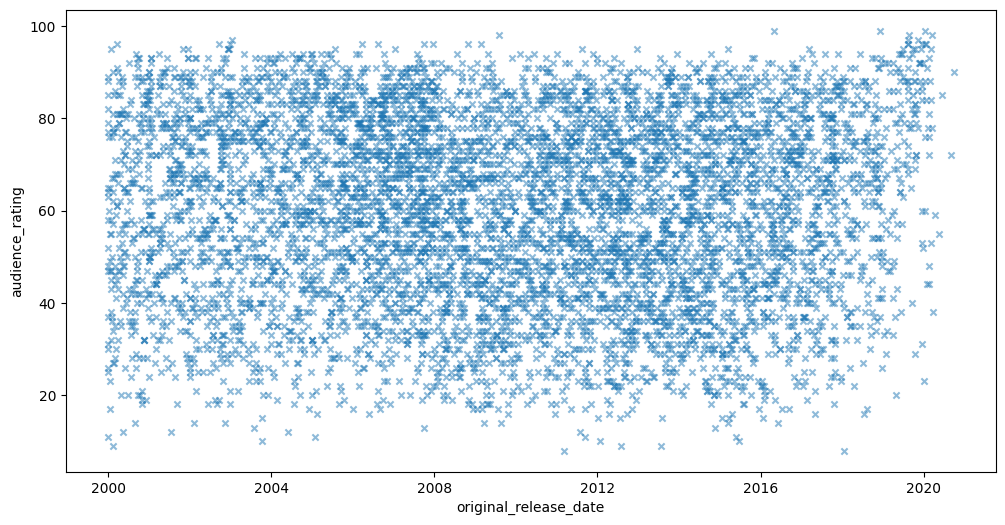

Time period does not seem to affect ratings much
However, it still may be a good idea to drop old movies to remove outdated actors, directors, etc


In [405]:
df.plot(x='original_release_date', y='audience_rating', kind='scatter', marker='x', alpha=0.5, figsize=(12, 6))
plt.show()

print("Time period does not seem to affect ratings much")
print("However, it still may be a good idea to drop old movies to remove outdated actors, directors, etc")

In [406]:
df = df.drop(["original_release_date", "streaming_release_date"], axis=1)

df.head(3)

,movie_title,content_rating,genres,directors,actors,runtime,production_company,tomatometer_rating,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,53.0
1,Please Give,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,87.0,64.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",109.0,Warner Bros. Pictures,8.0,37.0


Remove release dates from data because it cannot be trained on.

### Content Ratings

In [407]:
vals = df['content_rating'].value_counts()
print(vals)

print()

for val in vals.keys():
  rating = df[df['content_rating'] == val]
  std = rating['audience_rating'].std()
  mad = (rating['audience_rating'] - rating['audience_rating'].mean()).abs().mean()
  print(f"Rated {val} ({len(rating)} movies):")
  print(f"\tAverage Critic rating of {round(rating['audience_rating'].mean(), 2)} +/- (STD: {round(std, 2)} or MAD: {round(mad, 2)})")


content_rating
R        3151
PG-13    1946
NR       1025
PG        763
G         190
NC17       12
Name: count, dtype: int64

Rated R (3151 movies):
	Average Critic rating of 57.19 +/- (STD: 19.92 or MAD: 16.98)
Rated PG-13 (1946 movies):
	Average Critic rating of 59.68 +/- (STD: 19.01 or MAD: 15.97)
Rated NR (1025 movies):
	Average Critic rating of 66.43 +/- (STD: 18.17 or MAD: 14.84)
Rated PG (763 movies):
	Average Critic rating of 63.67 +/- (STD: 18.67 or MAD: 15.78)
Rated G (190 movies):
	Average Critic rating of 64.89 +/- (STD: 18.17 or MAD: 15.11)
Rated NC17 (12 movies):
	Average Critic rating of 65.92 +/- (STD: 20.13 or MAD: 17.1)


In [408]:
content_df = df['content_rating'].str.get_dummies()

df = df.drop('content_rating', axis=1).join(content_df)

df.head(3)

,movie_title,genres,directors,actors,runtime,production_company,tomatometer_rating,audience_rating,G,NC17,NR,PG,PG-13,R
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,53.0,0,0,0,1,0,0
1,Please Give,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,87.0,64.0,0,0,0,0,0,1
5,"10,000 B.C.","Action & Adventure, Classics, Drama",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",109.0,Warner Bros. Pictures,8.0,37.0,0,0,0,0,1,0


### Genre

In [409]:
genres_df = df['genres'].str.get_dummies(sep=', ')
vals = genres_df.columns
print(f"There are {len(vals)} unique genres")

df = df.drop('genres', axis=1).join(genres_df)

for val in vals:
  rating = df[df[val] == 1]
  std = rating['audience_rating'].std()
  mad = (rating['audience_rating'] - rating['audience_rating'].mean()).abs().mean()
  print(f"""\tAverage audience rating of {round(rating['audience_rating'].mean(), 2)} +/- (STD: {round(std, 2)} or MAD: {round(mad, 2)}) for movies with genre "{val}" ({len(rating)} movies)""")

There are 21 unique genres
	Average audience rating of 58.87 +/- (STD: 19.8 or MAD: 16.73) for movies with genre "Action & Adventure" (1516 movies)
	Average audience rating of 64.83 +/- (STD: 17.96 or MAD: 15.15) for movies with genre "Animation" (343 movies)
	Average audience rating of 72.5 +/- (STD: 13.59 or MAD: 11.0) for movies with genre "Anime & Manga" (6 movies)
	Average audience rating of 67.21 +/- (STD: 17.24 or MAD: 14.07) for movies with genre "Art House & International" (1078 movies)
	Average audience rating of 62.92 +/- (STD: 18.82 or MAD: 15.69) for movies with genre "Classics" (40 movies)
	Average audience rating of 56.73 +/- (STD: 18.21 or MAD: 15.35) for movies with genre "Comedy" (2461 movies)
	Average audience rating of 52.42 +/- (STD: 17.01 or MAD: 14.42) for movies with genre "Cult Movies" (12 movies)
	Average audience rating of 76.39 +/- (STD: 13.07 or MAD: 9.95) for movies with genre "Documentary" (665 movies)
	Average audience rating of 62.57 +/- (STD: 18.64 or 

In [410]:
df.head(3)

,movie_title,directors,actors,runtime,production_company,tomatometer_rating,audience_rating,G,NC17,NR,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,53.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Please Give,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,87.0,64.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",109.0,Warner Bros. Pictures,8.0,37.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Directors

In [411]:
print(f"{df['directors'].isna().sum()} movies have no recorded director in the dataset")

no_director_df = df[df['directors'].isna()]

74 movies have no recorded director in the dataset


In [412]:
directors_df = df['directors'].str.get_dummies(sep=', ').add_prefix('director ')

vals = directors_df.columns
print(f"There are {len(vals)} unique directors")

There are 4395 unique directors


### Actors

Actors are generally in order of role/popularity for the movie.

The CSV preserves the order from when looking up movie actors on the Rotten Tomatoes site.

In [413]:
print(f"{df['actors'].isna().sum()} movies have no recorded actors in the dataset")

no_actors_df = df[df['actors'].isna()]

57 movies have no recorded actors in the dataset


### Production Company


Biggest Production Companies
	Average audience rating of 59.34 +/- (STD: 18.8 or MAD: 15.83) for movies produced by Warner Bros. Pictures (313 movies)
	Average audience rating of 56.29 +/- (STD: 19.07 or MAD: 15.88) for movies produced by 20th Century Fox (291 movies)
	Average audience rating of 58.78 +/- (STD: 17.54 or MAD: 14.52) for movies produced by Universal Pictures (279 movies)
	Average audience rating of 58.39 +/- (STD: 19.47 or MAD: 16.42) for movies produced by IFC Films (261 movies)
	Average audience rating of 71.29 +/- (STD: 17.03 or MAD: 13.79) for movies produced by Sony Pictures Classics (220 movies)
	Average audience rating of 56.73 +/- (STD: 18.56 or MAD: 15.61) for movies produced by Paramount Pictures (199 movies)
	Average audience rating of 58.14 +/- (STD: 20.51 or MAD: 17.29) for movies produced by Magnolia Pictures (198 movies)
	Average audience rating of 58.79 +/- (STD: 17.84 or MAD: 14.88) for movies produced by Sony Pictures (162 movies)
	Average audience rat

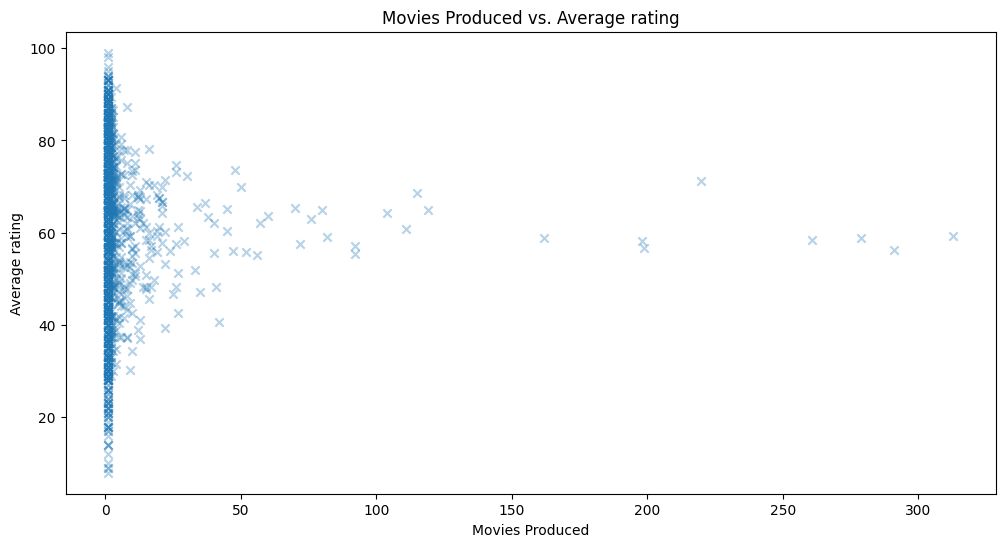

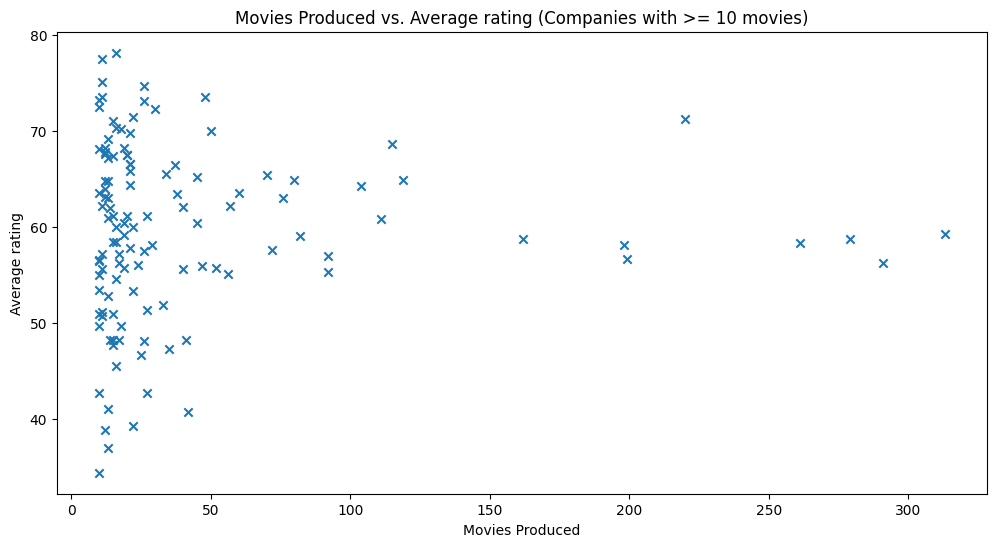

In [414]:
vals = df['production_company'].value_counts()

print()
print('Biggest Production Companies')
for val in vals.keys()[:10]:
  rating = df[df['production_company'] == val]
  std = rating['audience_rating'].std()
  mad = (rating['audience_rating'] - rating['audience_rating'].mean()).abs().mean()
  print(f"\tAverage audience rating of {round(rating['audience_rating'].mean(), 2)} +/- (STD: {round(std, 2)} or MAD: {round(mad, 2)}) for movies produced by {val} ({len(rating)} movies)")

print()

vals1 = []
vals2 = []
for val in vals.keys():
  rating = df[df['production_company'] == val]
  avg = round(rating['audience_rating'].mean(), 2)
  std = round(rating['audience_rating'].std(), 2)
  mad = round((rating['audience_rating'] - rating['audience_rating'].mean()).abs().mean(), 2)
  vals1.append({
      'name': val, 
      'average': avg, 
      'std': std,
      'mad': mad,
      'count': len(rating)
    })
  if len(rating) >= 10:
    vals2.append({
      'name': val, 
      'average': avg,
      'std': std, 
      'mad': mad,
      'count': len(rating)
    })

print(f"Most Highly Rated Production Companies (all {len(vals1)} companies)")
best_rated_producers = heapq.nlargest(5, vals1, key=lambda l: l['average'])
for x in best_rated_producers:
  print(f"\t{x['name']}: {x['average']} ({x['count']} movies)")

print()
print(f"Most Highly Rated Production Companies with >= 10 movies ({len(vals2)} companies)")
best_rated_producers = heapq.nlargest(5, vals2, key=lambda l: l['average'])
for x in best_rated_producers:
  print(f"\t{x['name']}: {x['average']} +/- (STD: {x['std']} or MAD: {x['mad']}) ({x['count']} movies)")


fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter([val['count'] for val in vals1], [val['average'] for val in vals1], marker='x', alpha=0.33)
ax.set_title('Movies Produced vs. Average rating')
ax.set_xlabel('Movies Produced')
ax.set_ylabel('Average rating')

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter([val['count'] for val in vals2], [val['average'] for val in vals2], marker='x')
ax.set_title('Movies Produced vs. Average rating (Companies with >= 10 movies)')
ax.set_xlabel('Movies Produced')
ax.set_ylabel('Average rating')

plt.show()

### Runtime

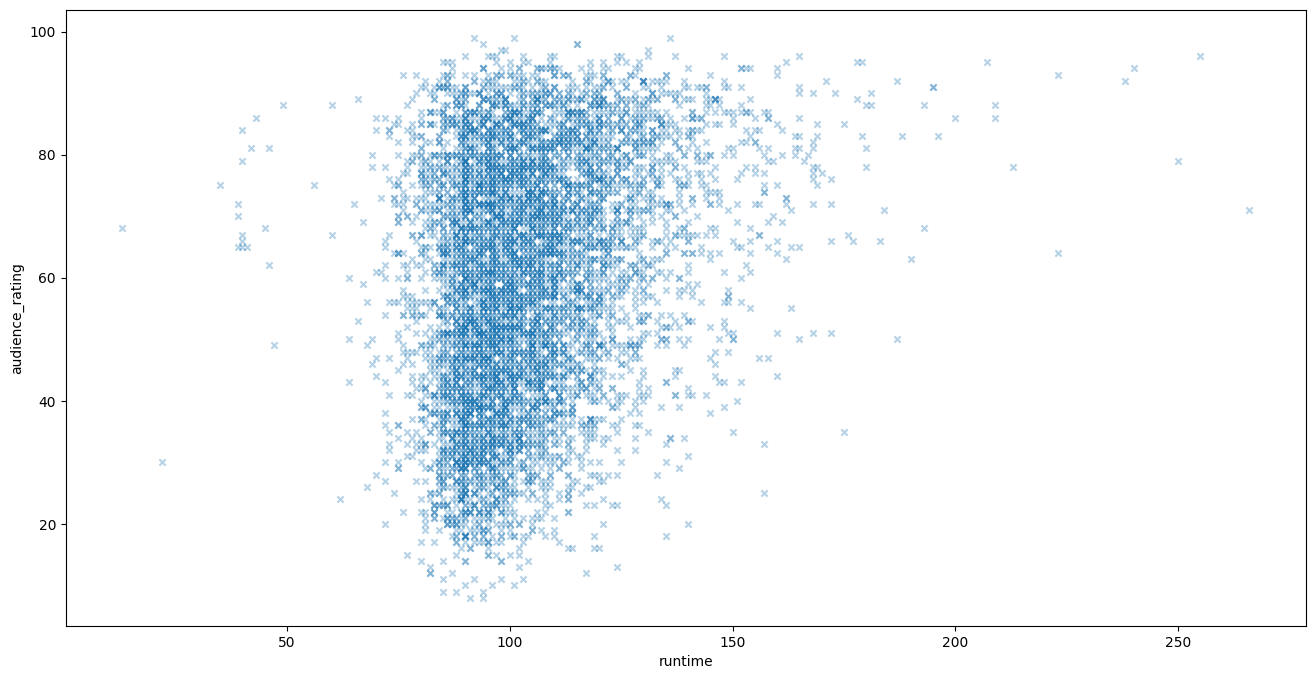

In [415]:


df.plot(x='runtime', y='audience_rating', kind='scatter', marker='x', figsize=(16, 8), alpha=0.33)
plt.show()

### Export New Data

In [416]:
df = df.drop('movie_title', axis=1)
df = df.drop('tomatometer_rating', axis=1)
df.head(3)

,directors,actors,runtime,production_company,audience_rating,G,NC17,NR,PG,PG-13,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,53.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,64.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",109.0,Warner Bros. Pictures,37.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [417]:
df.to_csv('data/evaluated_data.csv', index=False)